## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install datasets

In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datasets # Changed from nlp to datasets
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.19.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
dataset = datasets.load_dataset('emotion') # Changed from nlp.load_dataset to datasets.load_dataset

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

split/train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

split/validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

split/test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train=dataset['train']
val=dataset['validation']
test=dataset['test']

In [ ]:
def get_tweets(dataset):
  tweets=[x['text']for x in dataset]
  labels=[x['label']for x in dataset]
  return tweets,labels

In [ ]:
tweets, labels=get_tweets(train)

In [ ]:
tweets[100],labels[100]

('i wont let me child cry it out because i feel that loving her and lily when she was little was going to be opportunities that only lasted for those short few months',
 2)

## Task 4: Tokenizer

1. Tokenizing the tweets

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer=Tokenizer(num_words=10000,oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [ ]:
tweets[0]

'i didnt feel humiliated'

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

(array([  8.,  45., 310., 488., 539., 625., 626., 629., 613., 636., 654.,
        655., 608., 622., 609., 603., 559., 535., 530., 510., 452., 430.,
        382., 385., 330., 327., 336., 317., 238., 208., 200., 200., 167.,
        157., 141., 144., 120., 117., 117.,  88.,  96.,  72.,  66.,  66.,
         65.,  52.,  37.,  43.,  30.,  32.,  31.,  26.,  30.,  20.,  23.,
         14.,   9.,  10.,   4.,   4.,   4.,   1.,   4.,   1.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.]),
 <BarContainer object of 64 artists>)

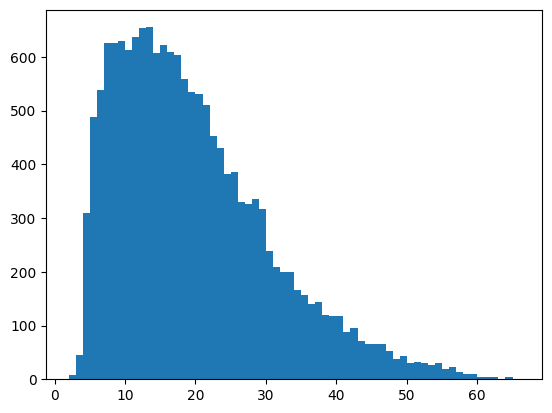

In [ ]:
lengths=[len(t.split(' '))for t in tweets]
plt.hist(lengths,bins=len(set(lengths)))

In [ ]:
maxlen=50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer,tweets):
  sequences=tokenizer.texts_to_sequences(tweets)
  padded_sequences=pad_sequences(sequences,truncating='post',padding='post',maxlen=maxlen)
  return padded_sequences

In [ ]:
padded_train_sequences=get_sequences(tokenizer,tweets)

In [ ]:
padded_train_sequences[100]

array([   2,  445,  207,   18,  379,  632,   13,   50,   37,    2,    3,
          9,  347,   68,    4, 4174,   34,   98,   20,   56,   20,   87,
          5,   28, 2746,    9,  118, 5291,   16,  143,  905,  192,  350,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
unique_labels = set(labels)
print(unique_labels)

{0, 1, 2, 3, 4, 5}


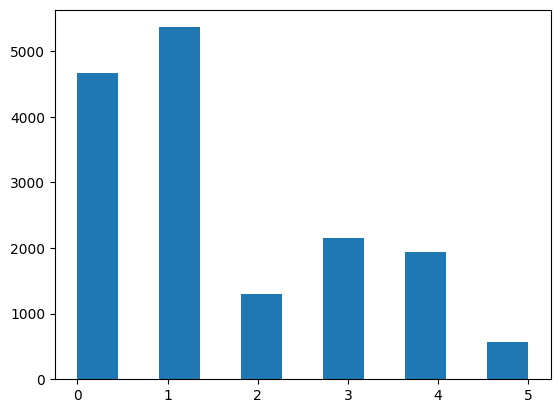

In [ ]:
plt.hist(labels,bins=11)
plt.show()

In [ ]:
class_to_index = dict((c,i) for i,c in enumerate(unique_labels))
index_to_classes = dict((v,k) for k,v in class_to_index.items())

In [ ]:
index_to_classes

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [ ]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [ ]:
train_labels=names_to_ids(labels)
print(train_labels[0])

0


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_tweets,val_labels=get_tweets(val)
val_seq=get_sequences(tokenizer,val_tweets)
val_labels=names_to_ids(val_labels)

In [ ]:
val_tweets[0],val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon',
 np.int64(0))

In [ ]:
h=model.fit(padded_train_sequences,
            train_labels,
            validation_data=(val_seq,val_labels),epochs=20,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)]
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.3687 - loss: 1.5608 - val_accuracy: 0.6520 - val_loss: 0.9402
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7362 - loss: 0.7578 - val_accuracy: 0.8195 - val_loss: 0.5461
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8870 - loss: 0.3490 - val_accuracy: 0.8525 - val_loss: 0.4301
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9378 - loss: 0.1996 - val_accuracy: 0.8895 - val_loss: 0.3406
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9629 - loss: 0.1227 - val_accuracy: 0.8860 - val_loss: 0.3748
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9706 - loss: 0.0931 - val_accuracy: 0.8905 - val_loss: 0.3374
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9766 - loss: 0.0754 - val_accuracy: 0.8955 - val_loss: 0.3521
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9809 - loss: 0.0581 - val_acc

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (32, 50, 16)           │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (32, 50, 40)           │         5,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (32, 40)               │         9,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 6)                │           246 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 527,780 (2.01 MB)

 Trainable params: 175,926 (687.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 351,854 (1.34 MB)

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

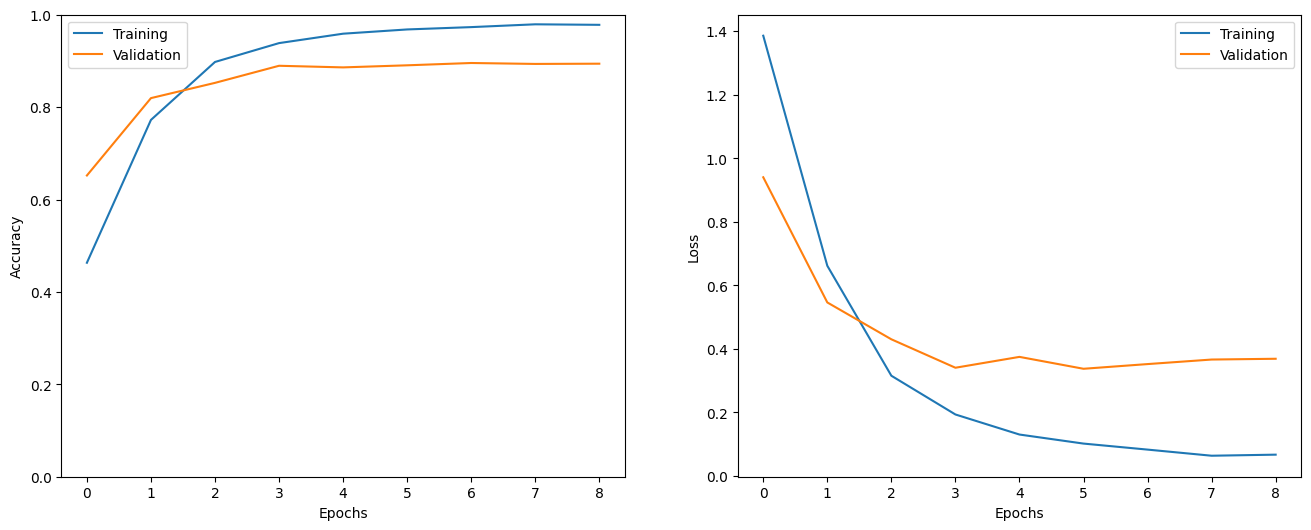

In [ ]:
show_history(h)

In [ ]:
test_tweets,test_labels=get_tweets(test)
test_seq=get_sequences(tokenizer,test_tweets)
test_labels=names_to_ids(test_labels)

In [ ]:
_=model.evaluate(test_seq,test_labels)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8818 - loss: 0.3983


In [ ]:
i=random.randint(0,len(test_labels)-1)
print('Sentence:',test_tweets[i])
print('Emotion:',index_to_classes[test_labels[i]])
p=model.predict(np.expand_dims(test_seq[i],axis=0))[0]
pred_class=index_to_classes[np.argmax(p).astype('uint8')]
print('Predicted Emotion:',pred_class)
print('Prediction Probabilities:', p)

Sentence: i have found that some korean men are turning to foreign women because of the freedom they feel it can be easily accounted for that dating between koreans can be a casual thing but more often than not it tends to be a serious matter
Emotion: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Emotion: 1
Prediction Probabilities: [9.4946421e-04 9.9741852e-01 5.1174813e-04 5.7173555e-04 5.2947016e-04
 1.9183681e-05]


In [ ]:
preds = np.argmax(model.predict(test_seq), axis=-1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


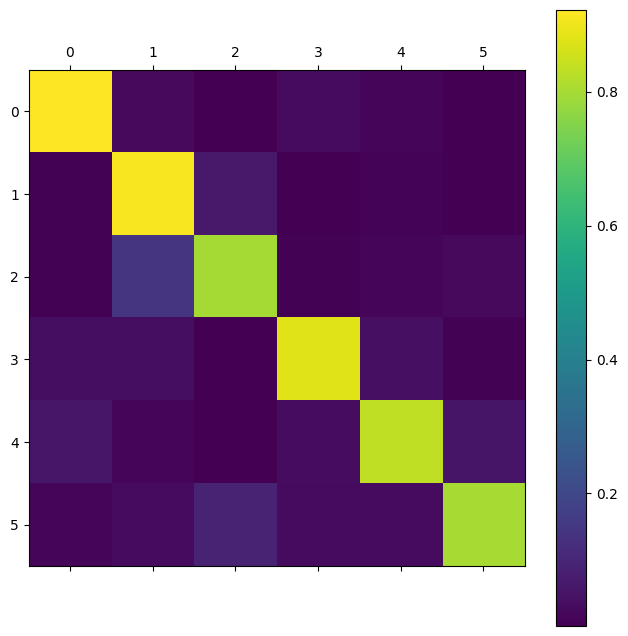

In [ ]:
show_confusion_matrix(test_labels, preds, list(index_to_classes.values()))

In [ ]:
!jupyter nbconvert --to script Tweet_Emotion_Recognition_Learner.ipynb
!jupyter nbconvert --to notebook Tweet_Emotion_Recognition_Learner.py


[NbConvertApp] WARNING | pattern 'Tweet_Emotion_Recognition_Learner.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_y

In [ ]:
!pip install nbconvert
!jupyter nbconvert --to python Tweet_Emotion_Recognition_Learner.ipynb
!jupyter nbconvert --to notebook Tweet_Emotion_Recognition_Learner.py


[NbConvertApp] WARNING | pattern 'Tweet_Emotion_Recognition_Learner.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_y

In [ ]:
!find /content -name "*.ipynb"


In [1]:
from google.colab import files
files.upload()


Saving Tweet_Emotion_Recognition_Learner (1).ipynb to Tweet_Emotion_Recognition_Learner (1).ipynb


{'Tweet_Emotion_Recognition_Learner (1).ipynb': b'{\n  "nbformat": 4,\n  "nbformat_minor": 0,\n  "metadata": {\n    "accelerator": "GPU",\n    "colab": {\n      "provenance": [],\n      "gpuType": "T4"\n    },\n    "kernelspec": {\n      "display_name": "Python 3",\n      "name": "python3"\n    },\n    "language_info": {\n      "codemirror_mode": {\n        "name": "ipython",\n        "version": 3\n      },\n      "file_extension": ".py",\n      "mimetype": "text/x-python",\n      "name": "python",\n      "nbconvert_exporter": "python",\n      "pygments_lexer": "ipython3",\n      "version": "3.8.3"\n    },\n    "widgets": {\n      "application/vnd.jupyter.widget-state+json": {\n        "7c80d04a6d594c0797baa02a29ad0cf5": {\n          "model_module": "@jupyter-widgets/controls",\n          "model_name": "HBoxModel",\n          "model_module_version": "1.5.0",\n          "state": {\n            "_dom_classes": [],\n            "_model_module": "@jupyter-widgets/controls",\n            "_

In [2]:
!ls


 sample_data  'Tweet_Emotion_Recognition_Learner (1).ipynb'


In [3]:
!jupyter nbconvert --to python "Tweet_Emotion_Recognition_Learner (1).ipynb"
!jupyter nbconvert --to notebook "Tweet_Emotion_Recognition_Learner (1).py"


[NbConvertApp] Converting notebook Tweet_Emotion_Recognition_Learner (1).ipynb to python
[NbConvertApp] Writing 6260 bytes to Tweet_Emotion_Recognition_Learner (1).py
[NbConvertApp] Converting notebook Tweet_Emotion_Recognition_Learner (1).py to notebook
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/nbformat/reader.py", line 19, in parse_json
    nb_dict = json.loads(s, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/json/decoder.py", line 338, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/json/decoder.py", line 356, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

The above exce

In [4]:
!ls


 sample_data
'Tweet_Emotion_Recognition_Learner (1).ipynb'
'Tweet_Emotion_Recognition_Learner (1).py'


In [5]:
!jupyter nbconvert --to notebook "Tweet_Emotion_Recognition_Learner (1).py" --output Tweet_Emotion_Recognition_Learner.ipynb


[NbConvertApp] Converting notebook Tweet_Emotion_Recognition_Learner (1).py to notebook
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/nbformat/reader.py", line 19, in parse_json
    nb_dict = json.loads(s, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/json/decoder.py", line 338, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/json/decoder.py", line 356, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 10, in <module>
    sys.exit

In [7]:
!pip install jupytext


In [8]:
!jupytext --to notebook "Tweet_Emotion_Recognition_Learner (1).py" -o Tweet_Emotion_Recognition_Learner.ipynb


[jupytext] Reading Tweet_Emotion_Recognition_Learner (1).py in format py
[jupytext] Writing Tweet_Emotion_Recognition_Learner.ipynb


In [9]:
!ls


 sample_data
'Tweet_Emotion_Recognition_Learner (1).ipynb'
'Tweet_Emotion_Recognition_Learner (1).py'
 Tweet_Emotion_Recognition_Learner.ipynb
